<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/stats/stat_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pingouin

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time
import pingouin 

#from pingouin import corr
import pandas.util.testing as tm

cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")

cco_cases_mdg.set_index('Date', inplace=True)

tilyvoa.set_index('Daty', inplace=True)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [5]:
tily = tilyvoa.loc[:,'Tily']
voa = tilyvoa.loc[:, 'Voa']
tsyvoa = tilyvoa.loc[:, 'Tsyvoa']
tilym = tilyvoa.loc[:,'Tilym']
type(voa)

pandas.core.series.Series

In [0]:
corr(tily, voa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.03,"[-0.29, 0.35]",0.001,-0.056,0.858324,0.053


In [0]:
corr(tily, tsyvoa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.986,"[0.97, 0.99]",0.973,0.971,1.075574e-29,1.0


In [0]:
corr(tily, voa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.074,"[-0.25, 0.38]",0.005,-0.051,0.665215,0.072


In [0]:
corr(tily, tsyvoa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.985,"[0.97, 0.99]",0.971,0.969,1.889566e-28,1.0


In [0]:
corr(tily, voa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.072,"[-0.25, 0.38]",0.005,-0.052,0.677592,0.071


In [0]:
corr(tily, tsyvoa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.988,"[0.98, 0.99]",0.976,0.975,4.178122e-29,1.0


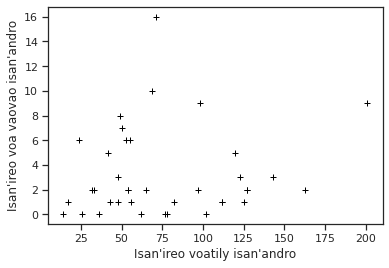

In [0]:
plt.figure()
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo voa vaovao isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa.eps')
plt.savefig(path_to_save+'tilvoa.png')

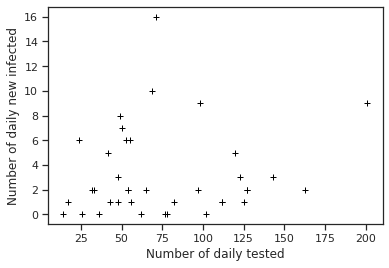

In [0]:
plt.figure()
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily new infected")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa_eng.png')

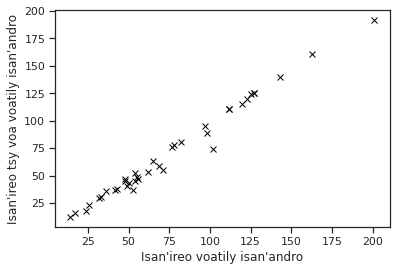

In [0]:
plt.figure()
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo tsy voa voatily isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa.eps')
plt.savefig(path_to_save+'tiltsvoa.png')

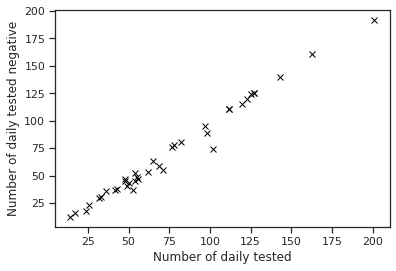

In [0]:
plt.figure()
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily tested negative")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa_eng.eps')
plt.savefig(path_to_save+'tiltsvoa_eng.png')

In [0]:
# Construction of contingency table
bt = pd.IntervalIndex.from_tuples([(13, 47), (47, 81), (81, 210)])
btt = pd.IntervalIndex.from_tuples([(10, 47), (47, 81), (81, 210)])
bv = pd.IntervalIndex.from_tuples([(-0.1, 1), (1,17)])

tilyvoa['Tily_heba'] = pd.cut(tilyvoa['Tily'], bins=bt, include_lowest=True)
tilyvoa['Voa_heba'] = pd.cut(tilyvoa['Voa'], bins=bv, include_lowest=True)
tilyvoa['Tilym_heba'] = pd.cut(tilyvoa['Tilym'], bins=bt, include_lowest=True)
tilyvoa['Tsyvoa_heba'] = pd.cut(tilyvoa['Tsyvoa'], bins=btt, include_lowest=True)

ddt = tilyvoa.loc[ : , ['Tily', 'Tily_heba'] ]
ddv = tilyvoa.loc[ : , ['Voa', 'Voa_heba'] ]
ddtv = tilyvoa.loc[ : , ['Tsyvoa', 'Tsyvoa_heba'] ]
ddtm = tilyvoa.loc[ : , ['Tilym', 'Tilym_heba'] ]


#print(ddt)
#print(ddv)

In [0]:
tomb_tv, hita_tv, stats_tv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Voa_heba')
tomb_tmv, hita_tmv, stats_tmv = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
tomb_ttv, hita_ttv, stats_ttv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Tsyvoa_heba')

tombm_ttv, hitam_ttv, statsm_ttv = pingouin.chi2_independence(tilyvoa, x='Tily', y='Tsyvoa')

print(tomb_tv)
print(tomb_tmv)
print(tomb_ttv)
print(hita_ttv)
print(hitam_ttv)

Voa_heba   (-0.1, 1.0]  (1.0, 17.0]
Tily_heba                          
(13, 47]      3.552632     5.447368
(47, 81]      5.921053     9.078947
(81, 210]     5.526316     8.473684
Voa_heba    (-0.1, 1.0]  (1.0, 17.0]
Tilym_heba                          
(13, 47]       3.947368     6.052632
(47, 81]       5.526316     8.473684
(81, 210]      5.526316     8.473684
Tsyvoa_heba  (10, 47]  (47, 81]  (81, 210]
Tily_heba                                 
(13, 47]     3.789474  2.368421   2.842105
(47, 81]     6.315789  3.947368   4.736842
(81, 210]    5.894737  3.684211   4.421053
Tsyvoa_heba  (10, 47]  (47, 81]  (81, 210]
Tily_heba                                 
(13, 47]            9         0          0
(47, 81]            7         8          0
(81, 210]           0         2         12
Tsyvoa  12   16   18   23   30   31   36   ...  115  120  124  125  140  161  192
Tily                                       ...                                   
14        1    0    0    0    0    0    0

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


In [0]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
observed

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


Voa_heba,"(-0.1, 1.0]","(1.0, 17.0]"
Tilym_heba,,
"(13, 47]",5,5
"(47, 81]",5,9
"(81, 210]",5,9


In [0]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
stats.round(5)

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


,test,lambda,chi2,dof,p,cramer,power
0,pearson,1.000,0.629,2.0,0.73001,0.12870,0.10045
1,cressie-read,0.667,0.626,2.0,0.73119,0.12837,0.10017
2,log-likelihood,0.000,0.621,2.0,0.73308,0.12784,0.09974
3,freeman-tukey,-0.500,0.618,2.0,0.73409,0.12755,0.09951
4,mod-log-likelihood,-1.000,0.616,2.0,0.73475,0.12737,0.09935
5,neyman,-2.000,0.616,2.0,0.73507,0.12728,0.09928
